import os
import plaid
import requests
import datetime
import json
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SECRET')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS')
print(len(PLAID_CLIENT_ID))
print(len(PLAID_SECRET))
print(len(PLAID_PUBLIC_KEY))
print(len(PLAID_ENV))
print(len(PLAID_PRODUCTS))

24
30
30
7
12


# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [4]:
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, 
                      public_key=PLAID_PUBLIC_KEY, environment='sandbox')

INSTITUTION_ID = "ins_109508"

### 2. Generate a public token

In [5]:
# YOUR CODE HERE
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

### 3. Exchange the public token for an access token

In [6]:
# YOUR CODE HERE
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

### 4. Fetch Accounts

In [8]:
# YOUR CODE HERE
access_token = exchange_response['access_token']

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [20]:
# YOUR CODE HERE
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now()) 
transactions_response = client.Transactions.get(access_token, start_date, end_date)
# Iterate and parse JSON response

### 2. Print the categories for each transaction

In [90]:
# YOUR CODE HERE
for i in range(49):
    print(transactions_response['transactions'][i]['category'])

['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Car Service', 'Ride Share']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel', 'Airlines and Aviation Services']
['Travel', 'Car Service', 'Ride Share']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Car Service', 'Ride Share']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Re

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [176]:
# YOUR CODE HERE
trans_date = []
trans_name = []
trans_amount = []
trans_category = []

for i in range(49):
    trans_date.append(transactions_response['transactions'][i]['date'])
    trans_name.append(transactions_response['transactions'][i]['name'])
    trans_amount.append(transactions_response['transactions'][i]['amount'])
    trans_category.append(transactions_response['transactions'][i]['category'][0])

trans_info = {'transaction_date':trans_date,'transaction_name':trans_name,
              'transaction_amount':trans_amount,'transaction_category':trans_category}

pd.set_option('display.width', 5000)

transaction_information=pd.DataFrame(trans_info)

transaction_information

,transaction_date,transaction_name,transaction_amount,transaction_category
0,2020-01-26,Tectra Inc,500.00,Food and Drink
1,2020-01-25,AUTOMATIC PAYMENT - THANK,2078.50,Payment
2,2020-01-25,KFC,500.00,Food and Drink
3,2020-01-25,Madison Bicycle Shop,500.00,Shops
4,2020-01-16,CREDIT CARD 3333 PAYMENT *//,25.00,Payment
5,2020-01-16,Uber 063015 SF**POOL**,5.40,Travel
6,2020-01-15,ACH Electronic CreditGUSTO PAY 123456,5850.00,Transfer
7,2020-01-15,CD DEPOSIT .INITIAL.,1000.00,Transfer
8,2020-01-14,Touchstone Climbing,78.50,Recreation
9,2020-01-14,United Airlines,-500.00,Travel


In [178]:
transaction_information.set_index('transaction_date',inplace=True)

### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [179]:
# YOUR CODE HERE
transaction_information['transaction_amount']=transaction_information['transaction_amount'].astype('float')
transaction_information

,transaction_name,transaction_amount,transaction_category
transaction_date,,,
2020-01-26,Tectra Inc,500.00,Food and Drink
2020-01-25,AUTOMATIC PAYMENT - THANK,2078.50,Payment
2020-01-25,KFC,500.00,Food and Drink
2020-01-25,Madison Bicycle Shop,500.00,Shops
2020-01-16,CREDIT CARD 3333 PAYMENT *//,25.00,Payment
2020-01-16,Uber 063015 SF**POOL**,5.40,Travel
2020-01-15,ACH Electronic CreditGUSTO PAY 123456,5850.00,Transfer
2020-01-15,CD DEPOSIT .INITIAL.,1000.00,Transfer
2020-01-14,Touchstone Climbing,78.50,Recreation


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [106]:
# YOUR CODE HERE
income_response = client.Income.get(access_token)
income_response

{'income': {'income_streams': [{'confidence': 0.99,
    'days': 690,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': 'sc6czfTGV8rSId4'}

In [110]:
gross_income = income_response['income']['last_year_income_before_tax']
current_monthly_income = income_response['income']['income_streams'][0]['monthly_income']
projected_yearly_income = income_response['income']['projected_yearly_income']
print(f"previous year's gross income is {gross_income}")
print(f"current monthly income is {current_monthly_income}")
print(f"projected yearly income is {projected_yearly_income}")

previous year's gross income is 7285
current monthly income is 500
projected yearly income is 6085


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FCF7B478C8>],
      dtype=object)

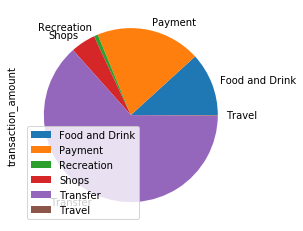

In [145]:
# YOUR CODE HERE
total_spending = transaction_information.groupby('transaction_category').sum()
total_spending.plot(kind = 'pie',subplots=True)

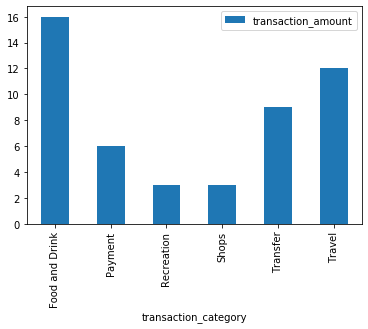

In [140]:
number_transcation = transaction_information.groupby('transaction_category').count()
number_transcation.drop(columns = 'transaction_name',inplace =True)
number_transcation.plot(kind='bar')

### Calculate the expenses per month

In [180]:
# YOUR CODE HERE
transaction_information.index


Index(['2020-01-26', '2020-01-25', '2020-01-25', '2020-01-25', '2020-01-16', '2020-01-16', '2020-01-15', '2020-01-15', '2020-01-14', '2020-01-14', '2020-01-13', '2020-01-13', '2020-01-12', '2020-01-11', '2020-01-01', '2019-12-30', '2019-12-27', '2019-12-26', '2019-12-26', '2019-12-26', '2019-12-17', '2019-12-17', '2019-12-16', '2019-12-16', '2019-12-15', '2019-12-15', '2019-12-14', '2019-12-14', '2019-12-13', '2019-12-12', '2019-12-02', '2019-11-30', '2019-11-27', '2019-11-26', '2019-11-26', '2019-11-26', '2019-11-17', '2019-11-17', '2019-11-16', '2019-11-16', '2019-11-15', '2019-11-15', '2019-11-14', '2019-11-14', '2019-11-13', '2019-11-12', '2019-11-02', '2019-10-31', '2019-10-28'], dtype='object', name='transaction_date')

In [183]:
transaction_information.groupby([transaction_information.index.year,transaction_information.index.month]).last()


AttributeError: 'Index' object has no attribute 'year'